# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load, Summarize and Visualize Dataset
Time series = 1 --> 400

Total dataset per Tool = 100

Total Tool = 3

(300, 400) (300,)
                0             1             2             3             4    \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   1.802619e-07  1.722375e-07  1.764684e-07  1.759426e-07  1.780347e-07   
std    2.970170e-07  2.605084e-07  2.647854e-07  2.642785e-07  2.669708e-07   
min    4.827774e-10  4.780808e-10  4.778729e-10  4.777009e-10  4.798176e-10   
25%    9.161088e-10  9.541006e-10  9.259613e-10  9.250441e-10  8.927637e-10   
50%    6.831493e-09  6.914991e-09  7.135397e-09  7.046443e-09  7.089585e-09   
75%    2.888088e-07  3.616763e-07  4.023258e-07  3.899274e-07  4.083110e-07   
max    1.214071e-06  9.136240e-07  9.404911e-07  8.903371e-07  9.372938e-07   

                5             6             7             8             9    \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean   1.778528e-07  1.791864e-07  1.790500e-07  1.800121e-07  1.799262e-07   
std    2.669821e-07  2.687996e-07

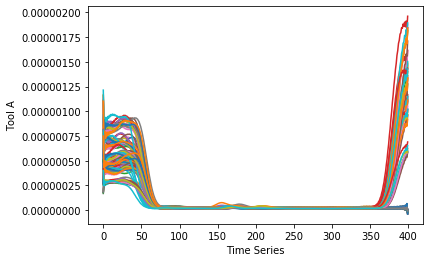

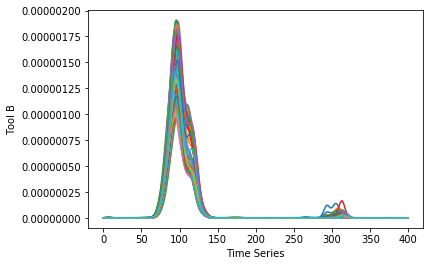

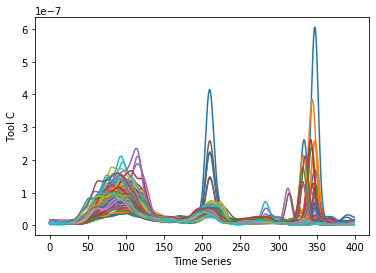

In [2]:
X = []
y = []

for j in ("A","B","C"): 
    path = "test2_data/Tool{}/".format(j)
    for i in range(1,101):
        file_path = path + "{}".format(j) + str(i) + '.csv'
        df = pd.read_csv(file_path,header=None)
        
        if j == "A":
            pyplot.figure(1)
            pyplot.xlabel("Time Series")
            pyplot.ylabel("Tool A")
            pyplot.plot(df)
            
        elif j == "B":
            pyplot.figure(2)
            pyplot.xlabel("Time Series")
            pyplot.ylabel("Tool B")
            pyplot.plot(df)
            
        elif j == "C":
            pyplot.figure(3)
            pyplot.xlabel("Time Series")
            pyplot.ylabel("Tool C")
            pyplot.plot(df)
        
        df = df[0].values.tolist()
        X.append(df)
        y.append(j)
        
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

print((pd.DataFrame(X)).describe())

uniqueValues, occurCount = np.unique(y,return_counts=True)
print(uniqueValues, occurCount)


# Separate Dataset

In [3]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)

print(trainX.shape,trainy.shape)
print(testX.shape, testy.shape)

(210, 400) (210,)
(90, 400) (90,)


# Train Models
Separate datasets to 70/30.

70% of the data will be used to train.
30% of the data will be used to validate.

Total 6 models are being used to train:
1. Logistic Regression
2. K-Nearest Neighbours Clasifier
3. Decision Tree Classifier
4. Support Vector Machines
5. Random Forest Classifier
6. Gradient Boosting Classifier

LR 100.000%
KNN 100.000%
CART 100.000%
SVM 100.000%
RF 100.000%
GBM 100.000%


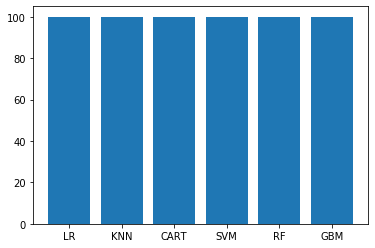

In [4]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
    # create a pipeline for the model
    scaler = StandardScaler()
    model = Pipeline(steps=[('s',scaler), ('m',models[i])])
    #model = models[i]
    # fit model = models[i]
    model.fit(trainX, trainy)
    # predict
    yhat = model.predict(testX)
    # evaluate
    score = accuracy_score(testy, yhat) * 100
    all_scores.append(score)
    # summarize
    print('%s %.3f%%' % (names[i], score))
    
    with open("{}.pickle".format(names[i]),"wb") as f:
        pickle.dump(model,f)
        
# plot
pyplot.bar(names, all_scores)
pyplot.show()

It can be observed all models have 100% accuracy.

# Evaluate Further using Cross Validation
Cross validation of 3 folds is used to evaluate the models further.

In [5]:
from sklearn.model_selection import cross_val_score
import time

# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()

for i in range(len(models)):
    start = time.process_time()
    scaler = StandardScaler()
    model = Pipeline(steps=[('s',scaler), ('m',models[i])])
    scores = cross_val_score(model, X, y, cv=3)
    print(names[i],"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2),"\tTime Taken: %0.2f sec" % (time.process_time() - start))

LR Accuracy: 0.98 (+/- 0.04) 	Time Taken: 1.45 sec
KNN Accuracy: 1.00 (+/- 0.00) 	Time Taken: 0.55 sec
CART Accuracy: 1.00 (+/- 0.00) 	Time Taken: 0.39 sec
SVM Accuracy: 0.98 (+/- 0.05) 	Time Taken: 0.28 sec
RF Accuracy: 1.00 (+/- 0.00) 	Time Taken: 0.64 sec
GBM Accuracy: 0.99 (+/- 0.02) 	Time Taken: 6.60 sec


It can be observed only KNN, Cart and RF have an accuracy of 100% without any std dev.
CART takes the least time to complete as compared to KNN and RF.
CART would be the best model for this task.